# Question 1:
(a) listen to the audio file, observe the waveform and spectrum, and compare y_ and sampled_signal.

(b) When factor = 2, listen to the audio file and observe the waveform and spectrum, and explain the difference between sampled_signal and x.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py
if not os.path.exists('263868__kevcio__amen-break-a-160-bpm.wav'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/263868__kevcio__amen-break-a-160-bpm.wav
import librosa
x, fs = librosa.load('263868__kevcio__amen-break-a-160-bpm.wav')
from IPython.display import Audio
x = x[:22050]

--2023-10-03 14:47:07--  https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/thinkdsp.py [following]
--2023-10-03 14:47:08--  https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/thinkdsp.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 48574 (47K) [text/plain]
Saving to: ‘thinkdsp.py’

thinkdsp.py         100%[===================>]  47.44K  --.-KB/s    in 0.005s  

2023-10-03 14:47:08 (9.86 MB/s) - ‘thinkdsp.py’ saved [48574/48574]

--2023-10-03 14:47:08--  https://github.com/AllenDo

In [ ]:
Audio(data=x, rate=fs)

input signal

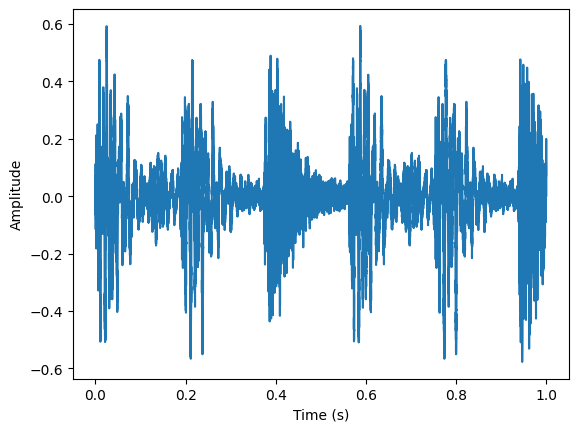

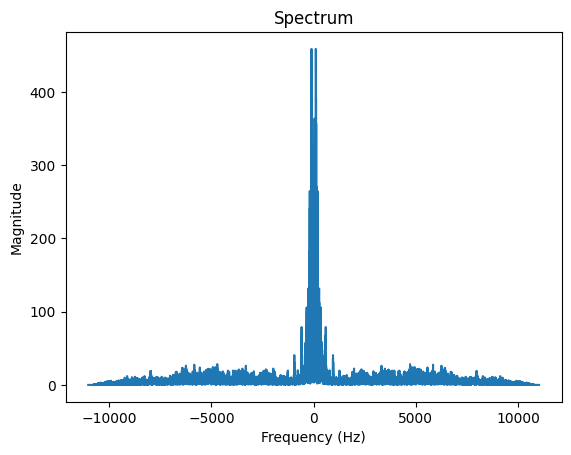

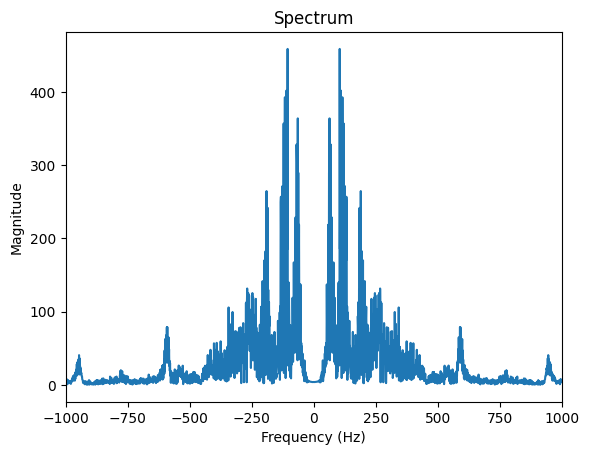

In [ ]:

# TODO: Create time axis
t = np.linspace(0, 1, 22050)

plt.plot(t, x)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

# generate spectrum
X = np.fft.fft(x)
freqs = np.fft.fftfreq(len(x), 1/fs)
idx = np.argsort(freqs)

# plot spectrum
plt.plot(freqs[idx], np.abs(X[idx]))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title(f'Spectrum')
plt.show()

plt.plot(freqs[idx], np.abs(X[idx]))
plt.xlim(-1000,1000)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title(f'Spectrum')
plt.show()

generate impulse train and sampling input signal x by multiplying impulse train

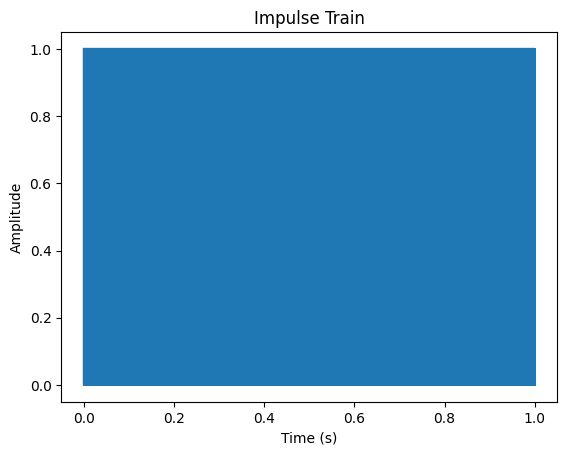

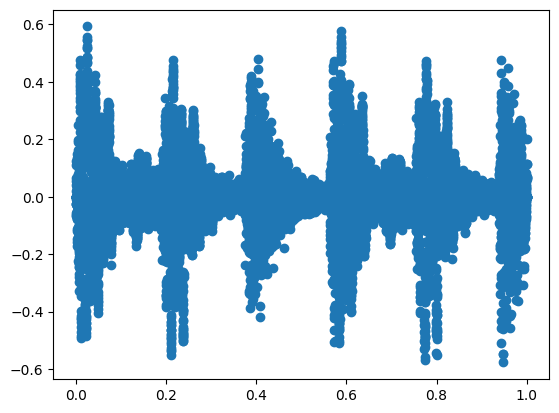

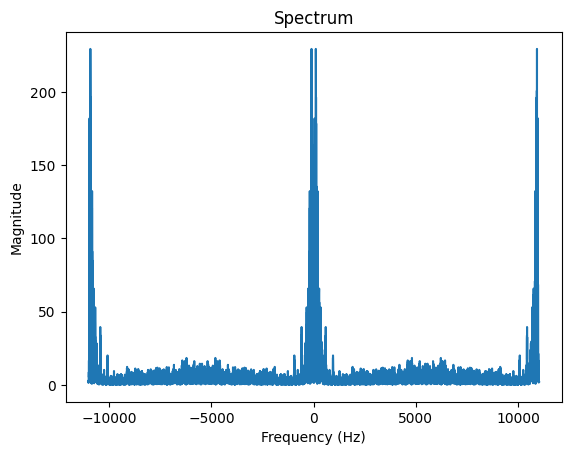

In [ ]:
# Generate impulse train
factor = 2

T = factor  # period of impulse train
N = len(x)  # number of samples

# TODO: Please generate an impulse train, and the period is T.
x_impulse = [1 if (i%T)==0 else 0 for i in range(0, 22050)]

# Plot impulse train
# TODO: Create time axis
t = np.linspace(0, 1, 22050)

plt.plot(t, x_impulse)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Impulse Train')
plt.show()

# TODO: sampling x by multipying x_impulse to x
x_sample = x_impulse * x

plt.scatter(t, x_sample)
plt.show()

# Generate spectrum
X = np.fft.fft(x_sample)
freqs = np.fft.fftfreq(len(x_sample), 1/(fs))
idx = np.argsort(freqs)

# plot spectrum
plt.plot(freqs[idx], np.abs(X[idx]))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title(f'Spectrum')
plt.show()

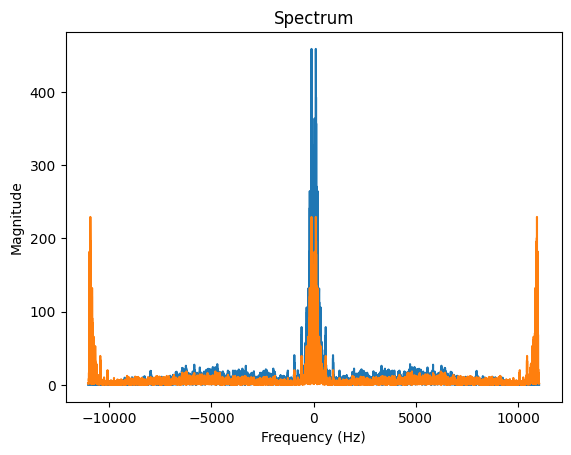

In [ ]:
X = np.fft.fft(x)
freqs = np.fft.fftfreq(len(x), 1/fs)
idx = np.argsort(freqs)

# plot spectrum of x
plt.plot(freqs[idx], np.abs(X[idx]))
X = np.fft.fft(x_sample)
freqs = np.fft.fftfreq(len(x_sample), 1/(fs))
idx = np.argsort(freqs)

# plot spectrum of x_sample
plt.plot(freqs[idx], np.abs(X[idx]))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title(f'Spectrum')
plt.show()


In [ ]:
import math
cutoff = fs/factor*len(x)/fs
shift = math.floor(fs/factor/2*len(x)/fs)
def rotate(l, n):
  return l[n:] + l[:n]

put sampled signal into lowpass filter

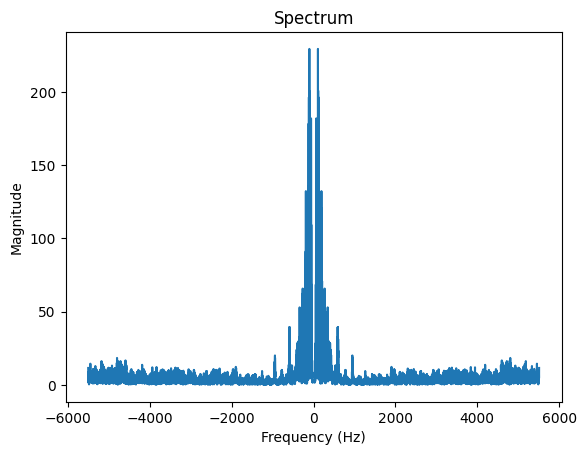

In [ ]:
low_pass = np.zeros_like(x)
low_pass[:int(cutoff)] = np.ones(int(cutoff))
low_pass = np.array(rotate(low_pass.tolist(), shift))
X_ = low_pass * X

plt.plot(np.array(freqs[-shift:].tolist()+freqs[:shift+1].tolist()), np.abs(np.array(X_[-shift:].tolist()+X_[:shift+1].tolist())))
plt.xlabel('Frequency (Hz)')

plt.ylabel('Magnitude')
plt.title(f'Spectrum')
plt.show()

In [ ]:
y_ = np.fft.ifft(np.array(X_[:shift+1].tolist()+X_[-shift:].tolist()))

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


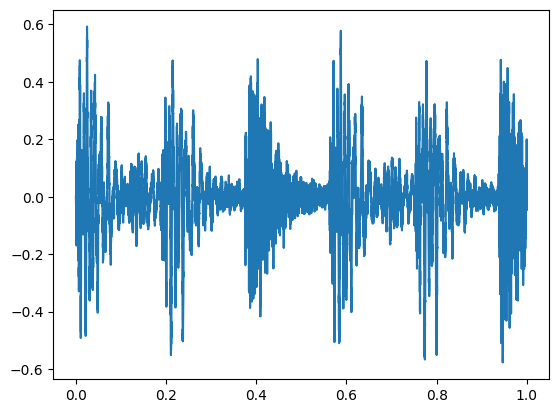

In [ ]:
t = np.arange(0, len(x)/fs, 1/(fs/factor))
plt.plot(t, y_)

sampling input signal x by taking the items in x with a period of T.

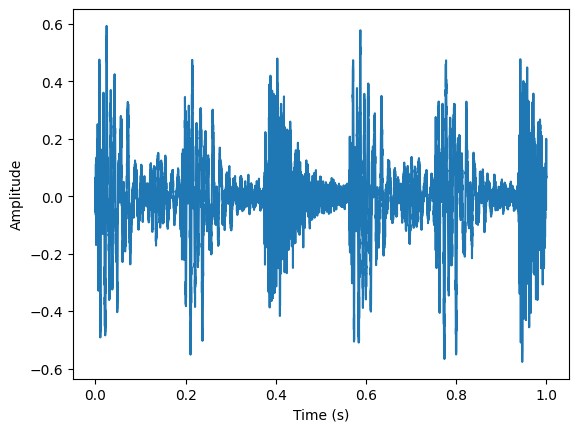

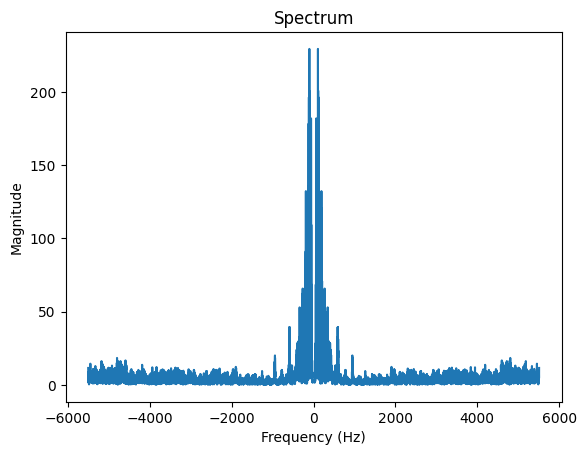

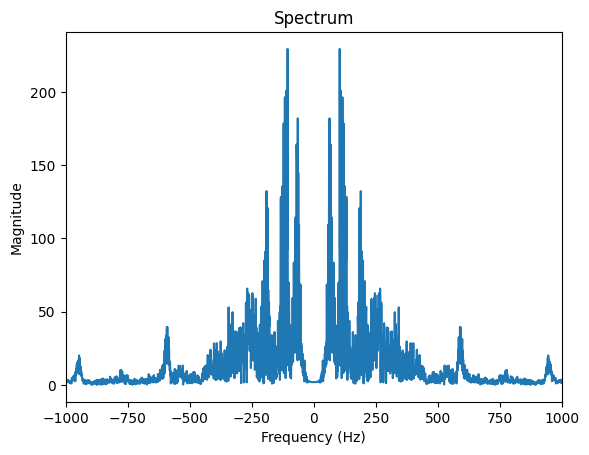

In [ ]:
import math
# TODO: sampling x by taking the items in x with a period of T.
sampled_signal = x[::2]

# TODO: create time axis
t = np.linspace(0, 1, 11025)

plt.plot(t, sampled_signal)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

# generate spectrum
X = np.fft.fft(sampled_signal)
freqs = np.fft.fftfreq(len(sampled_signal), 1/(fs/factor))
idx = np.argsort(freqs)

# plot spectrum
plt.plot(freqs[idx], np.abs(X[idx]))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title(f'Spectrum')
plt.show()

plt.plot(freqs[idx], np.abs(X[idx]))
plt.xlim(-1000,1000)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title(f'Spectrum')
plt.show()

# (a) listen to the audio file, observe the waveform and spectrum, and compare y_ and sampled_signal.

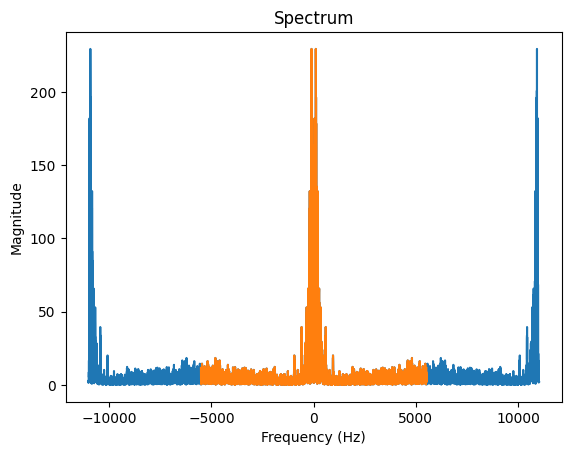

In [ ]:
# generate spectrum of x_sample
X = np.fft.fft(x_sample)
freqs = np.fft.fftfreq(len(x_sample), 1/(fs))
idx = np.argsort(freqs)

# plot spectrum of x_sample
plt.plot(freqs[idx], np.abs(X[idx]))
# generate spectrum of sampled_signal
X = np.fft.fft(sampled_signal)
freqs = np.fft.fftfreq(len(sampled_signal), 1/(fs/factor))
idx = np.argsort(freqs)

# plot spectrum of sampled_signal
plt.plot(freqs[idx], np.abs(X[idx]))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title(f'Spectrum')
plt.show()

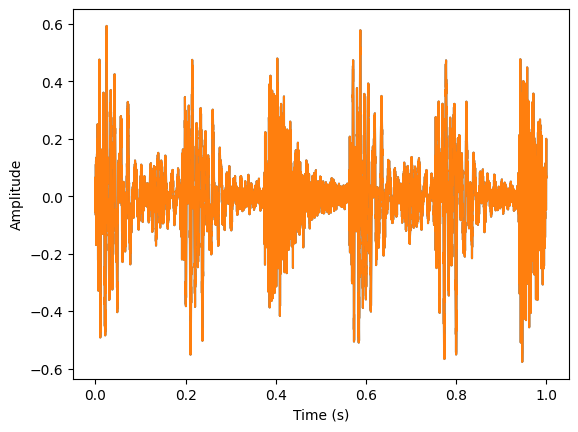

In [ ]:
t = np.arange(0, len(x)/fs, 1/(fs/factor))
plt.plot(t, sampled_signal)
t = np.arange(0, len(y_)/(fs/factor), 1/(fs/factor))
plt.plot(t, y_)

plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

In [ ]:
Audio(data=y_, rate=fs/factor)

/usr/local/lib/python3.10/dist-packages/IPython/lib/display.py:159: ComplexWarning: Casting complex values to real discards the imaginary part
  data = np.array(data, dtype=float)


In [ ]:
Audio(data=sampled_signal, rate=fs/factor)

# (b) When factor = 2, listen to the audio file and observe the waveform and spectrum, and explain the difference between sampled_signal and x.

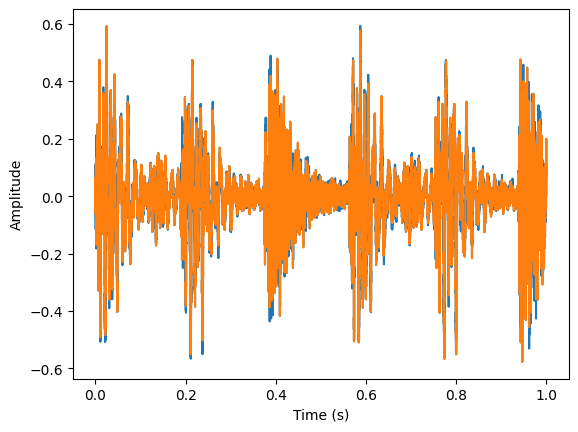

In [ ]:
t = np.arange(0, len(x)/fs, 1/(fs))
plt.plot(t, x)
t = np.arange(0, len(x)/(fs), 1/(fs/factor))
plt.plot(t, sampled_signal)

plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

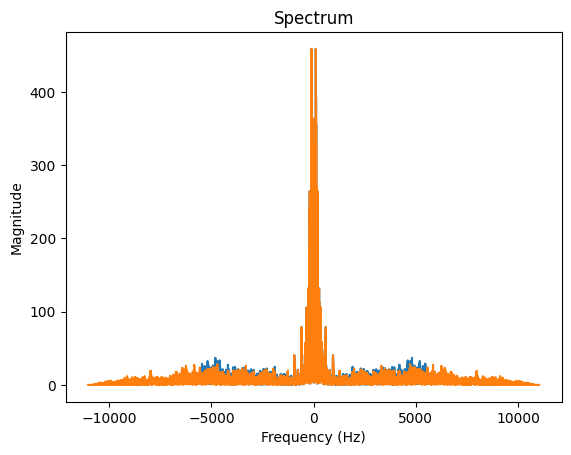

In [ ]:
# generate spectrum of sampled_signal
X = np.fft.fft(sampled_signal)
freqs = np.fft.fftfreq(len(sampled_signal), 1/(fs/factor))
idx = np.argsort(freqs)

# plot spectrum of sampled_signal
plt.plot(freqs[idx], np.abs(X[idx])*factor)
# generate spectrum of x
X = np.fft.fft(x)
freqs = np.fft.fftfreq(len(x), 1/fs)
idx = np.argsort(freqs)

# plot spectrum of x
plt.plot(freqs[idx], np.abs(X[idx]))

plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title(f'Spectrum')
plt.show()

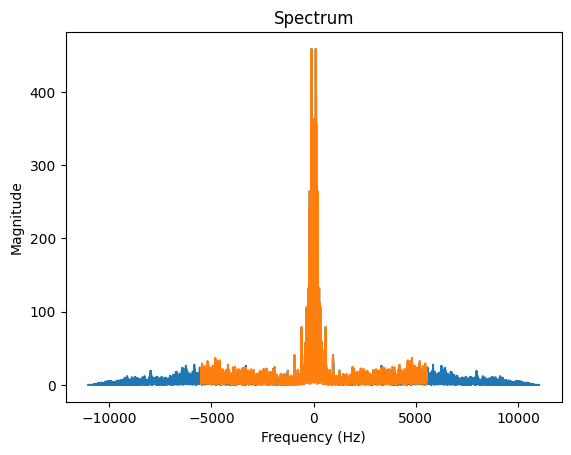

In [ ]:
# generate spectrum of x
X = np.fft.fft(x)
freqs = np.fft.fftfreq(len(x), 1/fs)
idx = np.argsort(freqs)

# plot spectrum of x
plt.plot(freqs[idx], np.abs(X[idx]))
# generate spectrum of sampled signal
X = np.fft.fft(sampled_signal)
freqs = np.fft.fftfreq(len(sampled_signal), 1/(fs/factor))
idx = np.argsort(freqs)

# plot spectrum of sampled signal
plt.plot(freqs[idx], np.abs(X[idx])*factor)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title(f'Spectrum')
plt.show()

In [ ]:
Audio(data=x, rate=fs)

In [ ]:
Audio(data=sampled_signal, rate=fs/factor)

# Question 2-1:

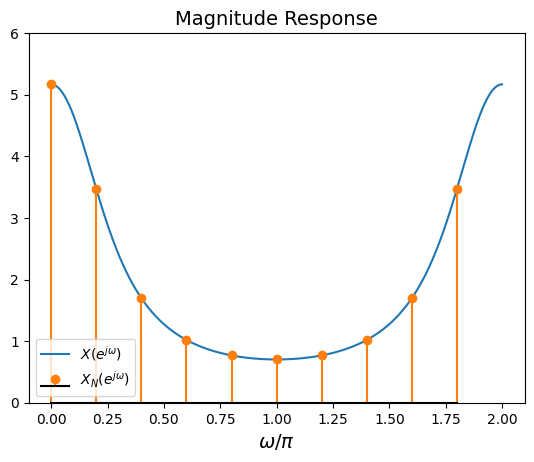

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Numerical DFT approximation of DTFT
w = np.linspace(0, 2, 1000) * np.pi
N = 10

# TODO: define X(e^jw),X, by w above and function in PPT
X = (5*np.sin(0.1*np.pi)*np.exp(-1j*w))/(1-np.cos(0.1*np.pi)*np.exp(-1j*w)+0.25*np.exp(-2j*w))

# TODO: define x[n] with length N
n = np.arange(N)
x_n = 10*((0.5)**n)*np.sin(0.1*np.pi*n)*np.heaviside(n,1)

# TODO: Calculate the DFT of x[n] and plot the corresponding x-coordinates wk of X[k] on a graph.
XN = np.fft.fft(x_n)
wk = 2/N * np.arange(N)

plt.plot(w/np.pi, np.abs(X))
plt.stem(wk, np.abs(XN), linefmt='C1-', markerfmt='C1o', basefmt='k')
plt.xlabel(r'$\omega/\pi$', fontsize=14)
plt.title('Magnitude Response', fontsize=14)
plt.legend(['$X(e^{j\omega})$', '$X_N(e^{j\omega})$'], loc='best')
plt.ylim(0, 6)
plt.show()

# Question 2-2:

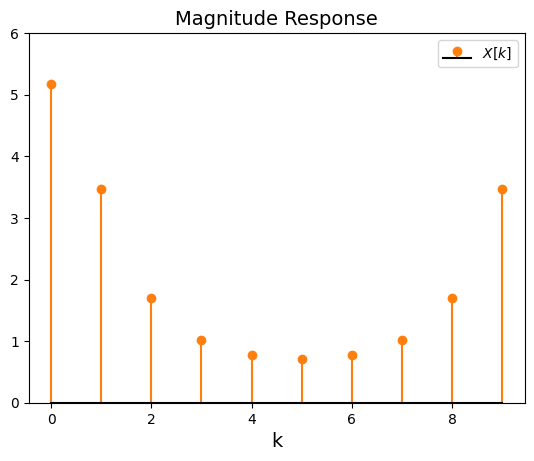

In [ ]:
# TODO: Calculate the DFT of x[n] and corresponding x-coordinates k
k = np.arange(N)

plt.stem(k, np.abs(XN), linefmt='C1-', markerfmt='C1o', basefmt='k')
plt.xlabel("k", fontsize=14)
plt.title('Magnitude Response', fontsize=14)
plt.legend(['$X[k]$'], loc='best')
plt.ylim(0, 6)
plt.show()

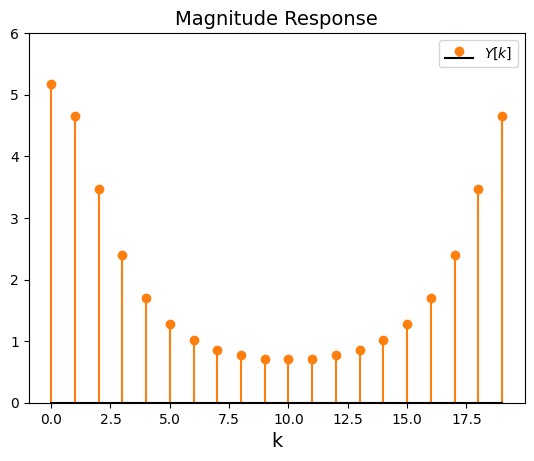

In [ ]:

# TODO: Define y[n] and calculate the DFT of y[n] and corresponding x-coordinates k
k = np.arange(2*N)
y_n = np.zeros(2*N)
y_n[:N] = x_n
YN = np.fft.fft(y_n)

plt.stem(k, np.abs(YN), linefmt='C1-', markerfmt='C1o', basefmt='k')
plt.xlabel("k", fontsize=14)
plt.title('Magnitude Response', fontsize=14)
plt.legend(['$Y[k]$'], loc='best')
plt.ylim(0, 6)
plt.show()

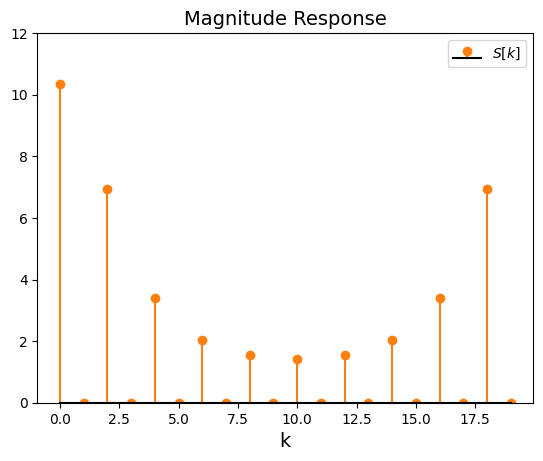

In [ ]:
# TODO: Define s[n] and calculate the DFT of s[n] and corresponding x-coordinates k
k = np.arange(2*N)
s_n = np.concatenate((x_n, x_n))
SN = np.fft.fft(s_n)

plt.stem(k, np.abs(SN), linefmt='C1-', markerfmt='C1o', basefmt='k')
plt.xlabel("k", fontsize=14)
plt.title('Magnitude Response', fontsize=14)
plt.legend(['$S[k]$'], loc='best')
plt.ylim(0, 12)
plt.show()